# UKG to CMiC Integration Middleware
This python project pulls time entry data from UKG Time Management (UTM) along with associated employee information, transforms it into the necessary format for upload to CMiC pytimesheets, and posts the entries. Check log files for errors.

In [1]:
import pandas as pd
from datetime import datetime
from pay_period import find_period_by_date,payRuntoPayGroup

selectionDate = datetime(2025,10,3)
#B or W for biweekly or weekly payruns
payRun = 'W'
PAYGROUPID = payRuntoPayGroup[payRun]
pay_period_file = "DataFiles/Pay_Period.csv"
df = pd.read_csv(pay_period_file, skiprows=2)
period_df = find_period_by_date(df,payRun,selectionDate)
period_df

,Period,Start Date,End Date,Process Date,Posting Date,Pay Date,Month,Posted Flag,Close Etimesheet Period,Pay Run
65,40,2025-09-28,2025-10-04,2025-10-04,2025-10-04,2025-10-04,10,N,N,W


In [2]:
startdate = period_df['Start Date'].iloc[0]
enddate = period_df['End Date'].iloc[0]
print(f"{startdate=}, {enddate=}, {payRun=}, {PAYGROUPID=}")

startdate=Timestamp('2025-09-28 00:00:00'), enddate=Timestamp('2025-10-04 00:00:00'), payRun='W', PAYGROUPID=43


In [3]:
import utm_load
utm_load.load_ukg(startdate, enddate, PAYGROUPID)

from cmic import load_cmic_projects
load_cmic_projects()

trying OrgLevel1...record counts for OrgLevel1:298
trying OrgLevel2...record counts for OrgLevel2:598
trying OrgLevel3...record counts for OrgLevel3:149
trying OrgLevel4...record counts for OrgLevel4:1
trying Location...record counts for Location:326
trying Paygroup...record counts for Paygroup:41
trying Project...record counts for Project:530
trying Job...record counts for Job:1075
trying Employee...record count for Employee: 2069
trying Time...record count for Time: 25
Requesting offset 0...Retrieved 500 records — hasMore: True
Requesting offset 500...Retrieved 500 records — hasMore: True
Requesting offset 1000...Retrieved 500 records — hasMore: True
Requesting offset 1500...Retrieved 192 records — hasMore: False
No more pages. Loaded 1692 items
Saved filtered project data to DataFiles/CMiC_Project_Summary.csv


In [4]:
from cmic import employee_push
startdate_str = startdate.strftime("%Y-%m-%d")
employee_push(startdate_str)

Requesting offset 0...Retrieved 153 records — hasMore: False
No more pages. Loaded 153 items
📦 Found 5 matching employees. Starting POSTs...

Requesting offset 0...Retrieved 276 records — hasMore: False
No more pages. Loaded 276 items
writing 1 records to file


In [6]:
from cmic import post_timesheets_to_CMiC
import pandas as pd
import matplotlib as mpl
df_timesheet_post_results = post_timesheets_to_CMiC('B',testing=True)

Post log written to DataFiles/PostResult/PostResults_10102025_131759.csv


In [7]:
df_timesheet_post_results.describe(include='all')

,EmpNo,WorkDate,PrnCode,Status,Response,Hours,SourceFile
count,25.000000,25,25,25.0,25,25.0,25
unique,NaN,5,1,NaN,1,NaN,1
top,NaN,2025-09-29,W,NaN,{ },NaN,PostResults_10072025_162705.csv
freq,NaN,5,25,NaN,25,NaN,25
mean,223576.800000,NaN,NaN,201.0,NaN,8.0,NaN
std,25.847308,NaN,NaN,0.0,NaN,0.0,NaN
min,223543.000000,NaN,NaN,201.0,NaN,8.0,NaN
25%,223550.000000,NaN,NaN,201.0,NaN,8.0,NaN
50%,223588.000000,NaN,NaN,201.0,NaN,8.0,NaN
75%,223601.000000,NaN,NaN,201.0,NaN,8.0,NaN


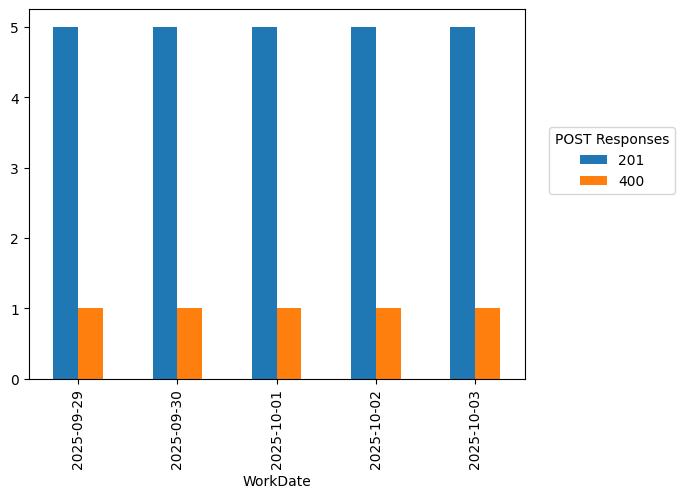

In [7]:
plot_data = df_timesheet_post_results.pivot_table(index='WorkDate',columns='Status',values='Hours',aggfunc='count')
chart = plot_data.plot(kind='bar')\
        .legend(loc=(1.05,0.5))\
        .set_title('POST Responses')
chart

In [9]:
df_timesheet_post_results.loc[df_timesheet_post_results["Status"]=="400"]

,EmpNo,WorkDate,PrnCode,Status,Response,Hours,SourceFile


In [15]:
df_timesheet_post_results.loc[df_timesheet_post_results["Status"]==201].count()

EmpNo         25
WorkDate      25
PrnCode       25
Status        25
Response      25
Hours         25
SourceFile    25
dtype: int64